In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import pickle

In [7]:
BnkDta = pd.read_csv('BankDataFinal.csv')

In [8]:
BnkDta.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing,loan,day_interval,age,balance,duration,campaign,pdays,previous,y
0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.25194,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.25194,0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,1,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.25194,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.25194,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.25194,0


# Data Spliltting

In [9]:
X= BnkDta[BnkDta.columns.difference(['y'])]
print(X.columns)
y= BnkDta['y']

Index(['age', 'balance', 'campaign', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_interval', 'default', 'duration',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'loan', 'marital_divorced',
       'marital_married', 'marital_single', 'month', 'pdays',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'previous'],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 37)
(11303, 37)
(33908,)
(11303,)


# Data Modelling

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.90


In [133]:
preds_LR= logreg.predict(X_test)

In [134]:
preds_LR

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [135]:
roc_LR=roc_auc_score(y_test,preds_LR)
print(roc_LR)

0.6525816040572278


[[ 439  886]
 [ 261 9717]]


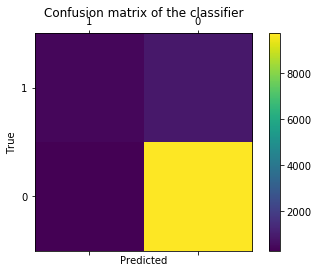

In [136]:
from sklearn.metrics import confusion_matrix

labels = [1,0]
cm = confusion_matrix(y_test, preds_LR, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
Dt_clf= DecisionTreeClassifier()
Dt_clf.fit(X_train,y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(Dt_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(Dt_clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [139]:
preds_DT = Dt_clf.predict(X_test)

In [140]:
preds_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
roc_DT=roc_auc_score(y_test,preds_DT)
print(roc_DT)

0.7026770593418729


[[ 642  683]
 [ 790 9188]]


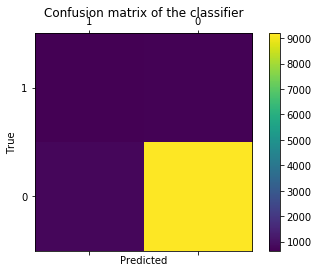

In [142]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_DT, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Nearest Neighbors

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.89


In [144]:
preds_Knn = knn.predict(X_test)

In [145]:
preds_Knn

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [146]:
roc_Knn= roc_auc_score(y_test,preds_Knn)
print(roc_Knn)

0.6541094180782628


[[ 455  870]
 [ 351 9627]]


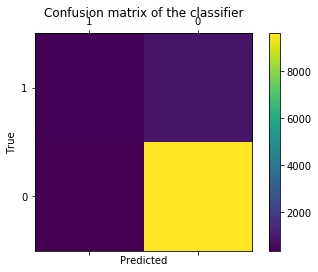

In [147]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_Knn, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Gaussian Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.82
Accuracy of GNB classifier on test set: 0.81


In [149]:
preds_NB = gnb.predict(X_test)

In [150]:
roc_NB = roc_auc_score(y_test, preds_NB)
print(roc_NB)

0.6998584054731731


[[ 732  593]
 [1524 8454]]


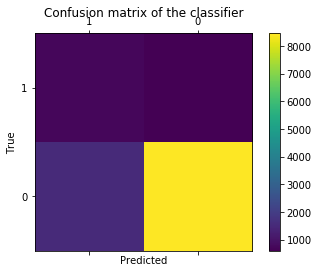

In [151]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_NB, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Support Vector Machine

In [152]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.90
Accuracy of SVM classifier on test set: 0.90


In [153]:
preds_svm = svm.predict(X_test)

In [154]:
roc_svm = roc_auc_score(y_test, preds_svm)
print(roc_svm)

0.6321244851881688


[[ 382  943]
 [ 240 9738]]


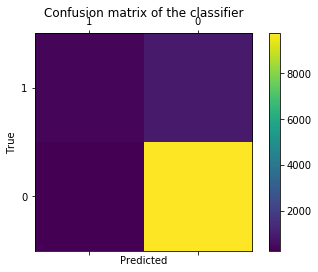

In [155]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_svm, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Neural Networks_Multi-layer Perceptron 

In [156]:
 from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2),random_state=1)

In [157]:
MLP.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [158]:
preds_MLP = MLP.predict(X_test)

In [159]:
print('Accuracy of ANN_MLP classifier on training set: {:.2f}'.format(MLP.score(X_train, y_train)))
print('Accuracy of ANN_MLP classifier on test set: {:.2f}'.format(MLP.score(X_test, y_test)))

Accuracy of ANN_MLP classifier on training set: 0.90
Accuracy of ANN_MLP classifier on test set: 0.90


In [160]:
roc_MLP = roc_auc_score(y_test,preds_MLP)
print(roc_MLP)

0.6553826342481762


[[ 452  873]
 [ 303 9675]]


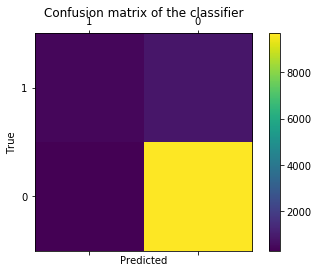

In [161]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_MLP, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Ensamble Methods

In [162]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [163]:
RF.fit(X_train, y_train)
print('Accuracy with Ensemble Methods classifier on training set: {:.2f}'.format(RF.score(X_train, y_train)))
print('Accuracy with Ensemble Methods classifier on test set: {:.2f}'.format(RF.score(X_test, y_test)))

Accuracy with Ensemble Methods classifier on training set: 0.99
Accuracy with Ensemble Methods classifier on test set: 0.90


In [164]:
preds_RF = RF.predict(X_test)

In [165]:
roc_RF = roc_auc_score(y_test,preds_RF)
print(roc_RF)

0.6518831240048862


[[ 441  884]
 [ 290 9688]]


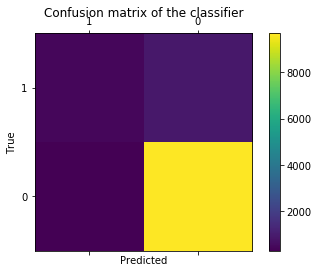

In [166]:
labels = [1,0]
cm = confusion_matrix(y_test, preds_RF, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Comparing the accuracy of ML models

In [167]:
accuracy=[roc_LR ,roc_DT ,roc_Knn , roc_NB ,roc_svm, roc_MLP, roc_RF]
accuracy

[0.6525816040572278,
 0.7026770593418729,
 0.6541094180782628,
 0.6998584054731731,
 0.6321244851881688,
 0.6553826342481762,
 0.6518831240048862]

In [168]:
models= ["LR", "DT", "KNN", "NB", "SVM","ANN","RF"]
models

['LR', 'DT', 'KNN', 'NB', 'SVM', 'ANN', 'RF']

In [169]:
d = {'model': models,'accuracy': accuracy}

In [170]:
Performane = pd.DataFrame(data=d)
Performane

,model,accuracy
0,LR,0.652582
1,DT,0.702677
2,KNN,0.654109
3,NB,0.699858
4,SVM,0.632124
5,ANN,0.655383
6,RF,0.651883


Text(0.5,1,'Comparing the Accuracy of Different ML Models')

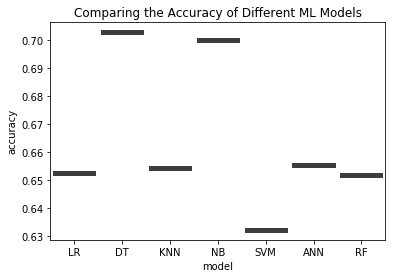

In [171]:
ax=sns.boxplot(x='model', y='accuracy', data=Performane,linewidth=5)
ax.set_title("Comparing the Accuracy of Different ML Models")

# Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [18]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.10232644 0.10468611 0.06714961 0.01000499 0.0049117  0.0091892
 0.04208799 0.00318981 0.25126302 0.00619885 0.00959676 0.00849916
 0.00448613 0.02739758 0.00891769 0.00826574 0.00487138 0.0040436
 0.01035175 0.00711055 0.00539681 0.0072444  0.00487391 0.01100066
 0.00483438 0.0017451  0.01191311 0.00684979 0.00803497 0.00734361
 0.0972714  0.02684289 0.01201046 0.00906117 0.05111813 0.02024204
 0.01966911]


# Comparing Different Feature-selection Techniques

In [20]:
from __future__ import print_function, division
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, f_classif, RFE
print(__doc__)

Automatically created module for IPython interactive environment


# Univariate Selection

We can take advantage of some common statistical tests to select those features that may have an important impact on the prediction process! In this section, " ANOVA F-value" is employed to select the best features from the dataset. 

In [22]:
# feature extraction
tst = SelectKBest(score_func= f_classif, k=30)
fit = tst.fit(X_train, y_train)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.547e+01 1.000e+02 1.891e+02 6.532e+02 5.464e+00 8.034e+02 7.630e+00
 1.864e+01 6.328e+03 4.896e+01 4.011e+01 1.374e+02 2.968e+00 6.944e+02
 2.335e+00 1.730e+02 1.434e+01 1.332e+01 3.018e+01 1.895e+02 7.925e-02
 2.701e+01 1.832e+02 2.042e+00 3.132e+01 7.261e-01 1.711e+02 1.721e+00
 1.376e+02 1.396e+02 1.439e+01 3.302e+02 2.432e+00 1.847e+01 3.654e+03
 9.213e+02 2.531e+02]
[[ 1.607  0.256 -0.569  0.     0.     1.     1.     0.     0.011  0.
   0.     1.     1.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     1.     0.     5.    -0.411  0.     0.     1.    -0.252]
 [ 0.289 -0.438 -0.569  0.     0.     1.     1.     0.    -0.416  0.
   1.     0.     1.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     1.     5.    -0.411  0.     0.     1.    -0.252]
 [-0.747 -0.447 -0.569  0.     0.     1.     1.     0.    -0.707  0.
   1.     0.     1.     0.     1.     0.     0.     0.     0.     0.
   0.     1.     1.     0.     5.    -0.411  0.     0.     1.  

# Recursive Feature Elimination

The Recursive Feature Elimination (RFE) works by recursively removing attributes and building a model on those attributes that remain. In this section, we use Decision Tree algorithm to select the most important features.

In [173]:
# feature extraction
model = DecisionTreeClassifier()
rfe = RFE(model, 30)
fit = rfe.fit(X, y)

print("Num Features: %d" % (fit.n_features_,))
#print(X.columns)
print("Selected Features: %s" % (fit.support_,))
print("Feature Ranking: %s" % (fit.ranking_,))
dic = {'Feature': X.columns ,'Rank':fit.ranking_ }
#Feature_RNK= pd.DataFrame(data=dic)

Num Features: 30
Selected Features: [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True False  True False  True  True False  True
  True False  True  True  True  True  True  True False  True  True False
  True]
Feature Ranking: [1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 2 1 3 1 1 6 1 1 8 1 1 1 1 1 1 5 1 1 4 1]


In [174]:
Feature_RNK= pd.DataFrame(data=dic)
Feature_RNK

,Feature,Rank
0,age,1
1,balance,1
2,campaign,1
3,contact_cellular,1
4,contact_telephone,1
5,contact_unknown,1
6,day_interval,1
7,default,7
8,duration,1
9,education_primary,1


# Principal Component Analysis

Principal Component Analysis (PCA) uses linear algebra to transform the dataset into a compressed form!

In [176]:
# Make an instance of the Model
pca = PCA(.95)

pca.fit(X_train)
# summarize components
print("number of selected PCA componens: %s" % (pca.n_components_,))
#print(fit.components_)

number of selected PCA componens: 16


In [177]:
#Apply the mapping (transform) to both the training set and the test set
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [178]:
## Apply Logistic Regression to the Transformed Data
logReg = LogisticRegression(solver = 'lbfgs')

In [179]:
logReg.fit(X_train_PCA,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
X_test_PCA.shape

(11303, 16)

In [182]:
pred_LR_PCA = logReg.predict(X_test_PCA)

In [189]:
roc_LR_PCA= roc_auc_score(y_test,pred_LR_PCA)
print(roc_LR_PCA)

0.5977552124106998


In [188]:
logReg.score(X_test_PCA, y_test)

0.8889675307440502

In [28]:
def pip(classifier):
    pipe = Pipeline([
        ('reduce_dim', PCA()),
        ('reduce_dim__n_components', 20),
        ('classify', LinearSVC())
    ])
    return(pipeline)

N_FEATURES_OPTIONS = [10, 20, 30]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(), NMF(),SelectKBest(f_classif),RFE()],
        'reduce_dim__n_components': [N_FEATURES_OPTIONS],
        'classify': C_OPTIONS
    },
]

grid = GridSearchCV(pipe, cv=3, n_jobs=2, param_grid=param_grid)


TypeError: __init__() missing 1 required positional argument: 'estimator'

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_